# Inquinanti aria Puglia - Serie near real-time | Ultima settimana rilevazioni

Caso di studio...
Partendo da OPEN DATA disponibili su: http://dati.arpa.puglia.it/dataset/monitoraggio-aria
(rilevati e validati) provenienti dalle centraline di monitoraggio Aria di ArpaPuglia a partire dal 11/11/2005
si procede alla manipolazione dei dataset realizzati con CKAN
Vengono utilizzati Anaconda, jupyter, Python + pandas, numpy, seaborn e matplotlib.


In [1]:
# RILEVAZIONI NEAR REAL-TIME LINK DATI JSON

url_centraline = 'http://dati.arpa.puglia.it/api/action/datastore_search?resource_id=cc6e384f-bc49-43be-817a-a4ead521dda5&limit=5000'
#query link Arpa
url_rilevazioni = 'http://dati.arpa.puglia.it/api/action/datastore_search?resource_id=d08afe64-0285-4334-bc9f-92f5d95e106e&limit=50000'
#query link Arpa
url_inquinanti = 'http://dati.arpa.puglia.it/api/action/datastore_search?resource_id=83edeb9a-6a37-4713-94f6-9d8e8000a2ac&limit=500'
#query link Arpa
#---------------------------------------------------------------------------------------------------------------------

In [2]:
import datetime
oggiDataOra = datetime.datetime.now() #data odierna
print('Ultimo aggiornamento al file: ', oggiDataOra)

Ultimo aggiornamento al file:  2018-06-03 20:57:24.681777


In [3]:
# importazione dei moduli necessari

import urllib.request
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML #visualizza html in jupyter notebok

In [4]:
# RILEVAZIONI STORICHE - download del file rilevazioni.csv - questo file non è sempre online e contattabile attraverso Json, 
# quindi si sceglie di scaricarlo, il download avviene nella cartella in cuoi si lavora con il notebook Jupyter

urllib.request.urlretrieve('http://dati.arpa.puglia.it/dataset/5b9debe2-47d0-4783-a073-92de3ca86aae/resource/0b00de5f-188e-4693-a6c8-3887b207409e/download/rilevazioni.csv','rilevazioni.csv')


('rilevazioni.csv', <http.client.HTTPMessage at 0x2980b479898>)

In [5]:
# moduli per rendere interattivi alcuni elementi



from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
with urllib.request.urlopen(url_rilevazioni) as url:
    data_rilevazioni = url.read()
    
with urllib.request.urlopen(url_centraline) as url:
    data_centraline = url.read()
    
with urllib.request.urlopen(url_inquinanti) as url:
    data_inquinanti = url.read()


In [7]:
response1 = json.loads(data_rilevazioni)
response2 = json.loads(data_centraline)
response3 = json.loads(data_inquinanti)


In [8]:
# questi sono i 3 dataset

rileva = pd.DataFrame(response1['result']['records'])
centra = pd.DataFrame(response2['result']['records'])
inquina = pd.DataFrame(response3['result']['records'])


In [9]:
rileva['data_rilevazione'].dtypes #verifichiamo il tipo di dato 'data_rilevazione' che non essendo in formato data va convertito

dtype('O')

In [10]:
#assegno = la conversione di ['data_rilevazione'] in datatime
rileva['data_rilevazione'] = pd.to_datetime(rileva['data_rilevazione']) 


rileva['data_rilevazione'].head(5) #visualizzo il dato 

0   2018-05-29 23:00:00
1   2018-05-30 05:00:00
2   2018-06-03 03:00:00
3   2018-06-01 12:00:00
4   2018-05-28 06:00:00
Name: data_rilevazione, dtype: datetime64[ns]

In [11]:
#verifico il tipo di formato in cui è il parametro ['valore'], va convertito in numero
rileva['valore'].dtypes 

dtype('O')

In [12]:
#assegno = la conversione di ['valore'] in float
rileva['valore'] = pd.to_numeric(rileva['valore']) 

rileva['valore'].dtypes

dtype('float64')

A questo punto è necessario puntualizzare che i dati contenuti nei dataset, su cui lavoriamo, sono rilevati e relativi a tutta la Regione Puglia. Nelle operazioni successive andiamo a subsettare il dataset 'rileva', lasciandolo integro, lavorando su dei sottoinsiemi

In [13]:
#ordino per data_rilevazione
rileva_dataordered = rileva.sort_values(by='data_rilevazione', ascending=False) 

Dopo aver ordinato in ordine decrescente il dataset, andiamo a filtrare tutte le righe contenenti solo PM10, in questa fase lavoreremo sul nuovo subset, senza modificare il dataframe 'rileva'

In [14]:
#filtro solo i PM10 assegnandoli al dataframe PM10
PM10 = rileva_dataordered[rileva_dataordered.sigla_inquinante == 'PM10'] 

PM10.head(5)

,_id,data_rilevazione,netcd,sigla_inquinante,statcd,valore
20563,11005500,2018-06-03 18:00:00,333,PM10,33,32.72280
1398,11005846,2018-06-03 18:00:00,333,PM10,55,28.32720
3285,11006280,2018-06-03 18:00:00,222,PM10,35,10.01220
12517,11005179,2018-06-03 18:00:00,111,PM10,35,11.23320
12329,11007650,2018-06-03 18:00:00,222,PM10,9,5.37241


In [15]:
# vericandone il tipo, python ci dice che si tratta appunto di un dataset di Pandas
type(PM10)


pandas.core.frame.DataFrame

In [30]:
# circoscrivo ulteriormente l'area di interesse, attraverso un ulteriore subset che va a focalizzarsi 
# su una precisa area di rilevazione dati 

barletta1 = (PM10[PM10.statcd == 57]) 
barletta2 = (PM10[PM10.statcd == 58])
andria = (PM10[PM10.statcd == 44]) 
molfetta = (PM10[PM10.statcd == 4]) 

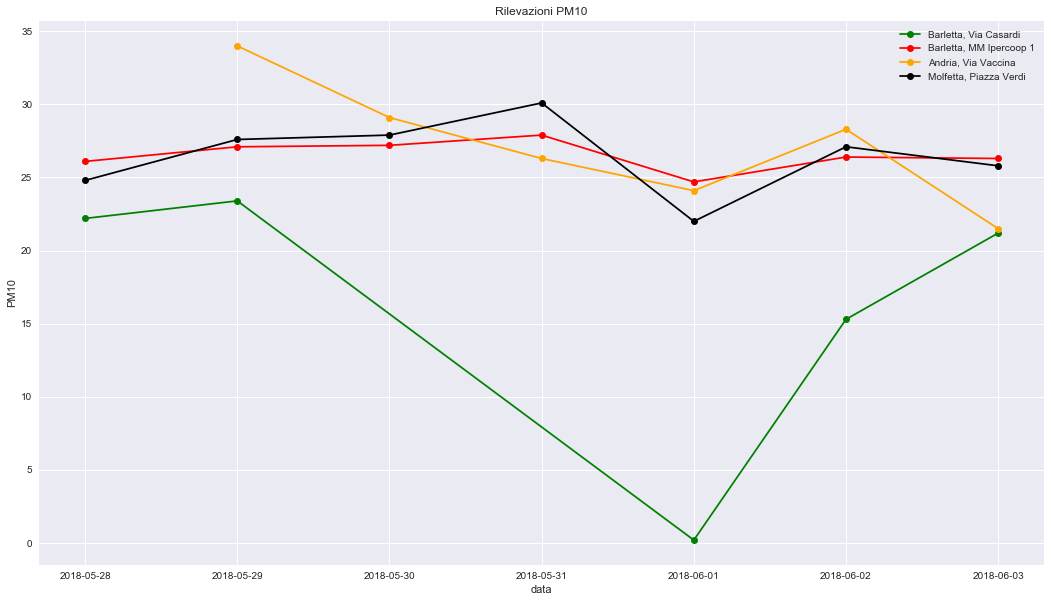

In [31]:
width = 18
height = 10
plt.figure(figsize=(width, height))
plt.plot(barletta1.data_rilevazione, barletta1.valore, 'go-', label='Barletta, Via Casardi')
plt.plot(barletta2.data_rilevazione, barletta2.valore, 'go-', label='Barletta, MM Ipercoop 1', color='red')
plt.plot(andria.data_rilevazione, andria.valore, 'go-', label='Andria, Via Vaccina', color='orange')
plt.plot(molfetta.data_rilevazione, molfetta.valore, 'go-', label='Molfetta, Piazza Verdi', color='black')

plt.xlabel('data'), plt.ylabel('PM10')
plt.legend()
plt.title('Rilevazioni PM10')

In [63]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = barletta1.data_rilevazione
y = barletta1.valore

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="PM10", x_axis_label='x', y_axis_label='y',plot_width=800, plot_height=300, x_axis_type='datetime' )


# add a line renderer with legend and line thickness
p.line(x, y, legend="Barletta.", line_width=2)
p.line(barletta2.data_rilevazione, barletta2.valore, legend="Barletta.", line_width=2, line_color="olivedrab")

# show the results
show(p)

display(HTML(filename='lines.html'))

In [19]:
poisson_lambda = (barletta1['valore'].mean() + barletta2['valore'].mean())/2
print(poisson_lambda)

21.494285714285716


In [20]:
s = np.random.poisson(poisson_lambda, size=1000000)

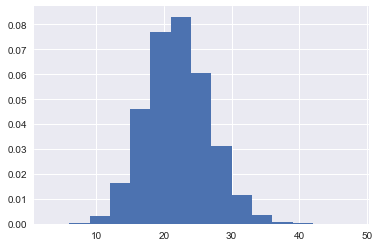

In [21]:
d = plt.hist(s, 15, normed=True) #stampa del grafico della deviazione di Poisson dove Lambda è il valore medio della serie

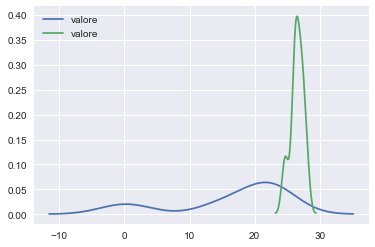

In [22]:
sns.kdeplot(barletta1['valore'])
sns.kdeplot(barletta2['valore'])

# Inquinanti aria Puglia - Serie storiche dal 2007 al 2018

A questo punto per approfondire l'argomento, andiamo ad operare sul dataset contenente le "serie storiche".

In [23]:
#Data la notevole dimensione delle serie storiche, è necessario scaricare il file.csv direttamente da Arpa.Puglia
#Dataset di riferimento: http://dati.arpa.puglia.it/dataset/monitoraggio-aria/resource/0b00de5f-188e-4693-a6c8-3887b207409e

storiche = pd.read_csv("rilevazioni.csv")
storiche.head()

,IDRilevazionePk,IdCentralinaFk,IdInquinanteFk,DataRilevazione,Valore,DataModifica
0,81,13,4,2005-11-11 00:00:00.000,78,2010-02-24 18:10:30.850
1,82,13,6,2005-11-11 00:00:00.000,2,2010-02-24 18:10:30.850
2,83,14,3,2005-11-11 00:00:00.000,40,2010-02-24 18:10:30.850
3,84,14,4,2005-11-11 00:00:00.000,N.D.,2010-02-24 18:10:30.850
4,85,14,6,2005-11-11 00:00:00.000,2,2010-02-24 18:10:30.850


In [24]:
storiche.dtypes #verifica del tipo di variabili presenti nel dataset ]>storiche<[

IDRilevazionePk     int64
IdCentralinaFk      int64
IdInquinanteFk      int64
DataRilevazione    object
Valore             object
DataModifica       object
dtype: object

In [44]:
#conversione dei formati
storiche['DataRilevazione'] = pd.to_datetime(storiche['DataRilevazione']) #assegno = la conversione di ['DataRilevazione'] in datatime
storiche['DataRilevazione'].dtypes #verifico il tipo di dato

dtype('<M8[ns]')

In [25]:
storiche['DataRilevazione'].head(5) #visualizzo il dato 
storiche['Valore'] = pd.to_numeric(storiche['Valore'], errors='coerce') #assegno = la conversione di ['Valore'] in float

In [26]:
storiche.dtypes

IDRilevazionePk             int64
IdCentralinaFk              int64
IdInquinanteFk              int64
DataRilevazione    datetime64[ns]
Valore                    float64
DataModifica               object
dtype: object

In [27]:
inquina.sort_values(by='nome', ascending=False) #ordino per data_rilevazione #visualizziamo le corrispondenze ID nella tabella con gli inquinanti

,_id,nome,sigla,soglia,soglia_alert,unita_misura
14,12,Polveri respirabili,PM2.5,None,None,µg/m³
11,8,Polveri inalabili,PM10,50,150,µg/m³
6,13,Particelle sospese PM2.5 SWAM,PM2.5 SWAM,None,None,µg/m³
13,11,Particelle sospese PM10 SWAM,PM10 SWAM,None,None,µg/m³
12,10,Particelle sospese PM10 ENV,PM10 ENV,None,None,µg/m³
8,9,PM10 orario,PM10 B,50,150,µg/m³
10,57294,PM10 orario,PM10 biora,50,150,µg/m³
9,7,Ozono,O3,120,180,µg/m³
2,3,Monossido di carbonio,CO,10,12,mg/m³
4,5,Idrocarburi Policiclici Aromatici,IPA TOT,None,None,ng/m³


In [43]:
storiche = storiche[(storiche['DataRilevazione'] >= '2007-01-01' ) & (storiche['DataRilevazione'] <= '2018-05-23') ]

storiche_dataord = storiche.sort_values(by='DataRilevazione', ascending=False) #ordino per data_rilevazione

storiche_dataord()

TypeError: 'DataFrame' object is not callable

In [34]:
#Attenzione ID inquinante delle serie storiche è diverso dal ID inqquinante delle serie near-real time

#dataset di riferimento: http://dati.arpa.puglia.it/dataset/monitoraggio-aria/resource/daf832c4-4efc-4c84-ac77-dd6665807b84

PM10s = storiche_dataord[storiche_dataord.IdInquinanteFk == 3] #filtro IdInquinanteFk del dataframe inquina (serie storiche)


 
PM10s.head()

#questo dataframe filtrato è relativo a tutte le stazioni di monitoraggio Puglia

,IDRilevazionePk,IdCentralinaFk,IdInquinanteFk,DataRilevazione,Valore,DataModifica
1218378,2350233,74,3,2018-05-23,NaN,2018-05-24 09:23:02.930
1218389,2350244,95,3,2018-05-23,NaN,2018-05-24 09:23:03.197
1218361,2350216,48,3,2018-05-23,NaN,2018-05-24 09:23:02.477
1218342,2350197,34,3,2018-05-23,NaN,2018-05-24 09:23:02.040
1218345,2350200,35,3,2018-05-23,25.0,2018-05-24 09:41:33.463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


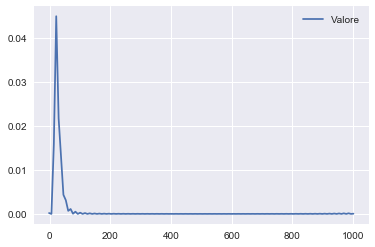

In [35]:
sns.kdeplot(PM10s['Valore']) 
#riporto sul grafico i valori presenti nella colonna filtrata PM10s['Valore']. 
#Il grafico evidenzia subito la presenza di anomalie nella rilevazione dei dati 
# o quanto meno, la presenza di rilevazioni di PM10, che arrivano a toccare punte di 500 µg/m³ in alcune zone

In [36]:
#ATTENZIONE - gli Id centraline delle rilevazioni storiche sono diversi dalle rilevazioni near-real time
#dataset di riferimento: http://dati.arpa.puglia.it/dataset/monitoraggio-aria/resource/daf832c4-4efc-4c84-ac77-dd6665807b84

barletta1s = (PM10s[PM10s.IdCentralinaFk == 71]) 
barletta2s = (PM10s[PM10s.IdCentralinaFk == 109])
andrias = (PM10s[PM10s.IdCentralinaFk == 63]) 
molfettas = (PM10s[PM10s.IdCentralinaFk == 14]) 

In [37]:
barletta1s.head()

,IDRilevazionePk,IdCentralinaFk,IdInquinanteFk,DataRilevazione,Valore,DataModifica
1218512,2350367,71,3,2018-05-23,15.0,2018-05-24 10:57:03.463
1217934,2349789,71,3,2018-05-22,NaN,2018-05-23 09:55:08.510
1217437,2349292,71,3,2018-05-21,20.0,2018-05-22 09:31:41.007
1216474,2348329,71,3,2018-05-20,14.0,2018-05-21 09:39:59.283
1216329,2348184,71,3,2018-05-19,16.0,2018-05-21 09:39:43.720


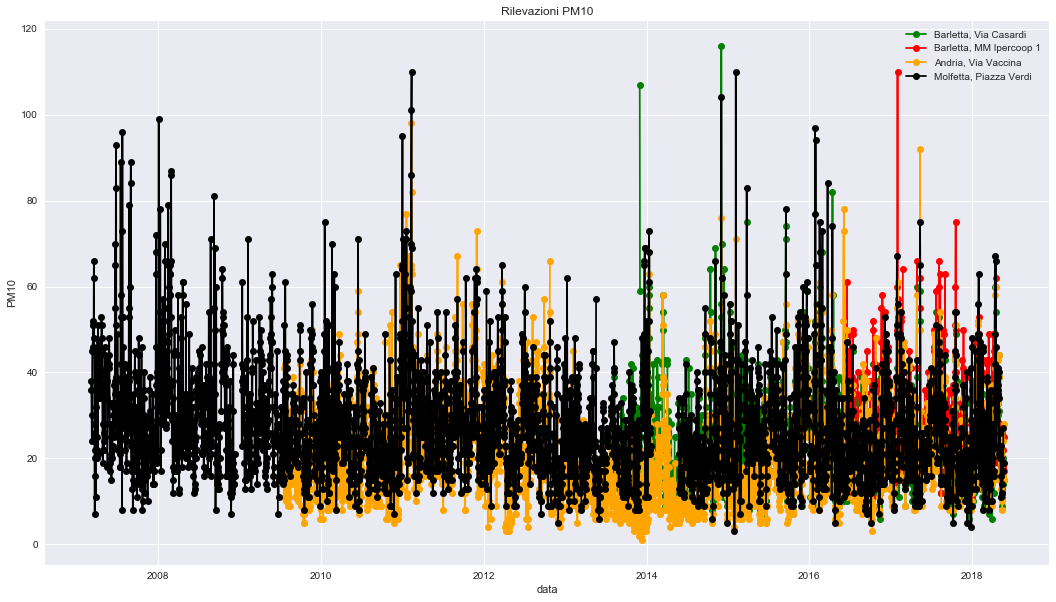

In [38]:
width = 18
height = 10
plt.figure(figsize=(width, height))
plt.plot(barletta1s.DataRilevazione, barletta1s.Valore, 'go-', label='Barletta, Via Casardi')
plt.plot(barletta2s.DataRilevazione, barletta2s.Valore, 'go-', label='Barletta, MM Ipercoop 1', color='red')
plt.plot(andrias.DataRilevazione, andrias.Valore, 'go-', label='Andria, Via Vaccina', color='orange')
plt.plot(molfettas.DataRilevazione, molfettas.Valore, 'go-', label='Molfetta, Piazza Verdi', color='black')

plt.xlabel('data'), plt.ylabel('PM10')
plt.legend()
plt.title('Rilevazioni PM10')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


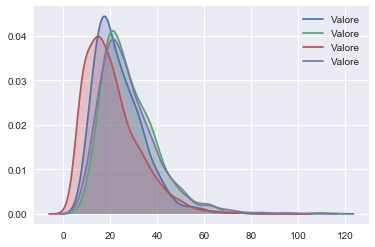

In [40]:
sns.kdeplot(barletta1s['Valore'], shade=True, vertical=False, kernel='gau', bw='scott', gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, ax=None)
sns.kdeplot(barletta2s['Valore'],shade=True, vertical=False, kernel='gau', bw='scott', gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, ax=None)
sns.kdeplot(andrias['Valore'],shade=True, vertical=False, kernel='gau', bw='scott', gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, ax=None) 
sns.kdeplot(molfettas['Valore'], shade=True, vertical=False, kernel='gau', bw='scott', gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, ax=None) 

In [41]:
barletta1s = barletta1s.fillna(0)
barletta2s = barletta2s.fillna(0)

In [42]:
barletta1s_norm = barletta1s.drop('DataRilevazione', 1)

barletta1s_norm = barletta1s_norm.drop('DataModifica', 1)
barletta1s_norm.head()

,IDRilevazionePk,IdCentralinaFk,IdInquinanteFk,Valore
1218512,2350367,71,3,15.0
1217934,2349789,71,3,0.0
1217437,2349292,71,3,20.0
1216474,2348329,71,3,14.0
1216329,2348184,71,3,16.0


In [66]:
# normalizzazione

In [67]:
barletta1s_normalizzato = (barletta1s_norm - barletta1s_norm.min()) / (barletta1s_norm.max() - barletta1s_norm.min())
barletta1s_normalizzato.head()

,IDRilevazionePk,IdCentralinaFk,IdInquinanteFk,Valore
1218512,1.000000,NaN,NaN,0.129310
1217934,0.999356,NaN,NaN,0.000000
1217437,0.998803,NaN,NaN,0.172414
1216474,0.997730,NaN,NaN,0.120690
1216329,0.997569,NaN,NaN,0.137931


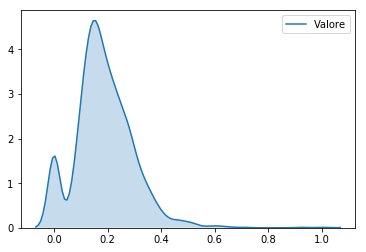

In [69]:
sns.kdeplot(barletta1s_normalizzato['Valore'], shade=True)